In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
mumbai_data = pd.read_csv('Filtered_Mumbai_data.csv')
plt.style.use('dark_background')

In [72]:
mumbai_data = mumbai_data.iloc[: , 2:]

In [73]:
mumbai_data.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Average_price_per_sq_ft', 'Andheri', 'Badlapur', 'Boisar', 'Borivali',
       'Chembur', 'Dahisar', 'Dombivli', 'Ghatkopar', 'Goregaon', 'Kalyan',
       'Kamothe', 'Kandivali', 'Kharghar', 'Malad', 'Mira Road', 'Mulund',
       'Naigaon', 'Nala Sopara', 'Panvel', 'Parle', 'Powai', 'Taloja', 'Thane',
       'Ulwe', 'Vasai', 'Virar'],
      dtype='object')

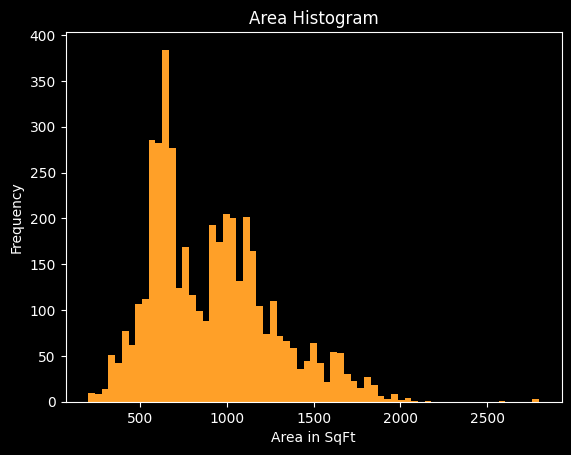

In [74]:
#Area Analysis
condition_area = mumbai_data['Area'] < 3700
df_area = mumbai_data['Area'][condition_area]
plt.title("Area Histogram")
plt.hist( df_area , bins = int(np.sqrt(len(df_area))) , color='#FFA028')
plt.xlabel("Area in SqFt")
plt.ylabel("Frequency")
plt.show()

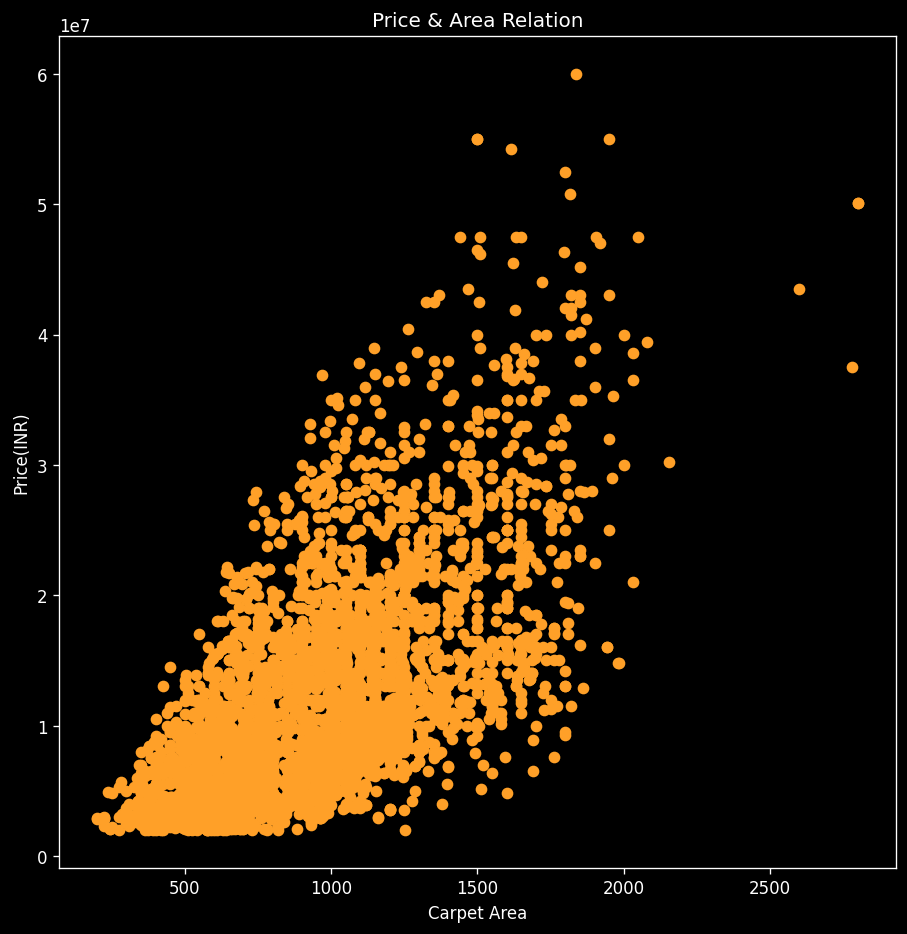

In [75]:
#Area and Price
mumbai_data = mumbai_data.sort_values(by='Area' , ascending=True)
plt.figure(figsize=(9, 9), dpi=120)
plt.title("Price & Area Relation")
plt.scatter( mumbai_data['Area'] , mumbai_data['Price'], color='#FFA028' )
plt.xlabel("Carpet Area")
plt.ylabel("Price(INR)")
plt.show()

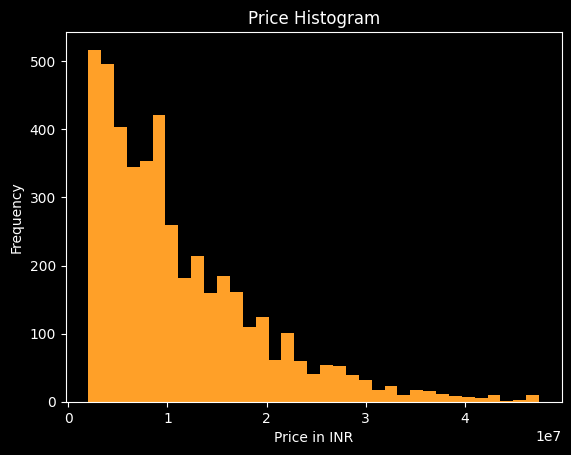

In [76]:
#Price Analysis
#int(np.sqrt(len(mumbai_data['Price'])))
condition =  mumbai_data['Price']> 1000000 
condition2 = mumbai_data['Price']< 50000000
plt.title("Price Histogram")
plt.hist( mumbai_data['Price'][condition2][condition] , bins = 35  , color='#FFA028')
plt.xlabel("Price in INR")
plt.ylabel("Frequency")
plt.show()

In [77]:
'''
We have so many locations that it will be very difficult to fit inside the model
so we are going to merge similar location column
like:

'''
mumbai_data.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Average_price_per_sq_ft', 'Andheri', 'Badlapur', 'Boisar', 'Borivali',
       'Chembur', 'Dahisar', 'Dombivli', 'Ghatkopar', 'Goregaon', 'Kalyan',
       'Kamothe', 'Kandivali', 'Kharghar', 'Malad', 'Mira Road', 'Mulund',
       'Naigaon', 'Nala Sopara', 'Panvel', 'Parle', 'Powai', 'Taloja', 'Thane',
       'Ulwe', 'Vasai', 'Virar'],
      dtype='object')

In [78]:
mumbai_data.shape

(4517, 44)

In [79]:
cols = ['Price' , 'Area']
for col  in cols:
    Q1 = mumbai_data[col].quantile(0.25)
    Q3 = mumbai_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    mumbai_data = mumbai_data[(mumbai_data[col] >= lower) & (mumbai_data[col] <= upper)]

'''
Here We removed all the outliers data values
we use the rule of thumb developed by statistician John Tukey
that purposes Any data point lying more than 1.5 * IQR below Q1 or above Q3 is considered an outlier.
'''

'\nHere We removed all the outliers data values\nwe use the rule of thumb developed by statistician John Tukey\nthat purposes Any data point lying more than 1.5 * IQR below Q1 or above Q3 is considered an outlier.\n'

In [80]:
mumbai_data.shape

(4326, 44)

In [81]:
'''
Analysis of Corelation between diffrent parameters
'''
import seaborn as sns


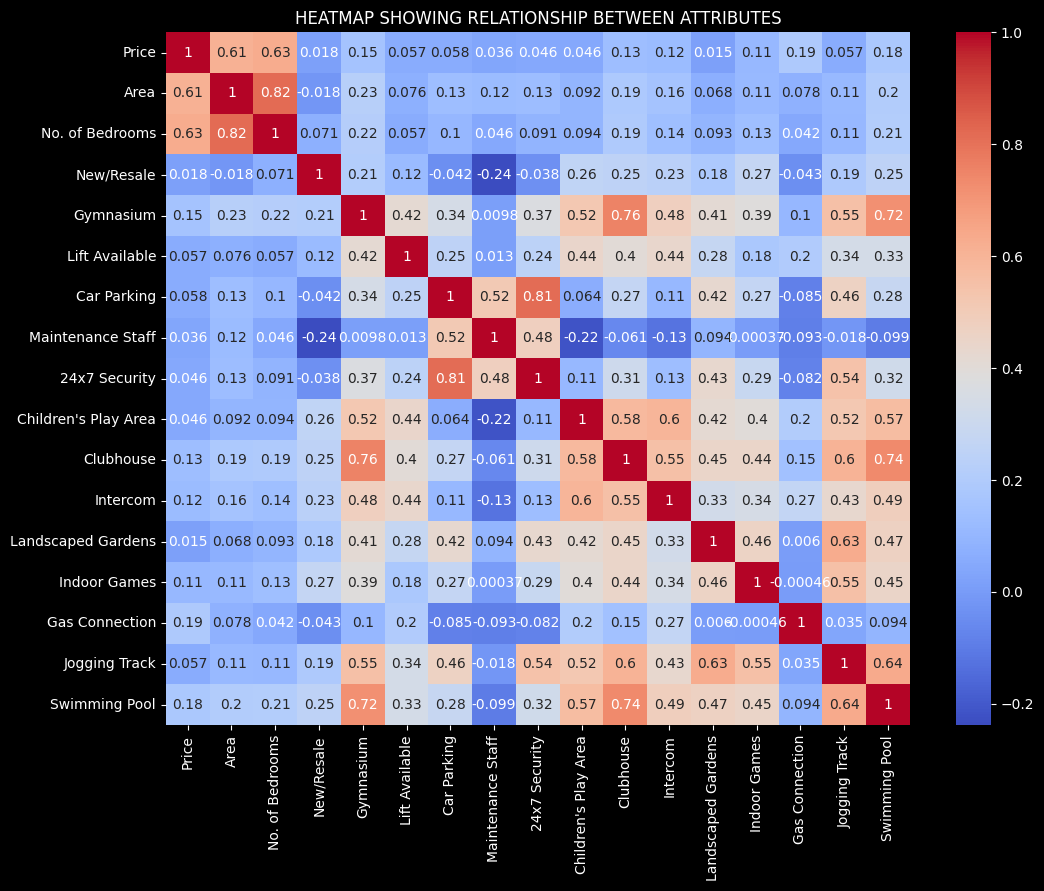

In [82]:
mumbai_data_features = mumbai_data.iloc[::,0:17]
corelation_matrix = mumbai_data_features.corr()
plt.figure(figsize=(12,9))
plt.title("HEATMAP SHOWING RELATIONSHIP BETWEEN ATTRIBUTES")
sns.heatmap(corelation_matrix , cmap='coolwarm' ,annot=True)
plt.show()

In [83]:
''' 
From the above Heatmap we can find relation between diffrent properties
as we can see Price of the propery it hevily releted to no of bedreeom and area

DROP gas connection , New/Resale , Lift Available
'''
# mumbai_data.insert(loc = 3 , column='Activities and Aminities' ,value=None)
# mumbai_data.insert(loc = 4 , column='Security and Parking',value=None)


' \nFrom the above Heatmap we can find relation between diffrent properties\nas we can see Price of the propery it hevily releted to no of bedreeom and area\n\nDROP gas connection , New/Resale , Lift Available\n'

In [84]:
mumbai_data

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Naigaon,Nala Sopara,Panvel,Parle,Powai,Taloja,Thane,Ulwe,Vasai,Virar
1758,2800000,200,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1757,2900000,200,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1759,2900000,220,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,2900000,220,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3698,2900000,225,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,11500000,1771,3,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3683,26000000,1775,3,1,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1734,22500000,1780,3,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
53,15000000,1780,3,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
mumbai_data.columns[0:20]

Index(['Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Average_price_per_sq_ft', 'Andheri', 'Badlapur'],
      dtype='object')

In [86]:
# mumbai_data['Activities and Aminities'] = mumbai_data['Gymnasium'] + mumbai_data["Children's Play Area"] + mumbai_data['Clubhouse'] + mumbai_data['Intercom'] + mumbai_data['Landscaped Gardens'] + mumbai_data['Indoor Games'] + mumbai_data['Jogging Track'] + mumbai_data['Swimming Pool'] 
# mumbai_data['Security and Parking'] = mumbai_data['Car Parking'] + mumbai_data['Maintenance Staff'] + mumbai_data['24x7 Security']

# columns_to_drop = ['New/Resale', 'Gymnasium','Car Parking', 'Maintenance Staff', '24x7 Security',"Children's Play Area", 'Clubhouse', 'Intercom', 'Landscaped Gardens','Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',]
columns_to_drop = ['Gas Connection']

mumbai_data = mumbai_data.drop(columns_to_drop , axis=1)


In [87]:
# mumbai_data.loc[mumbai_data['Activities and Aminities'] >= 1 , 'Activities and Aminities'] = 1
# mumbai_data.loc[mumbai_data['Security and Parking'] >= 1 , 'Security and Parking'] = 1

In [88]:
mumbai_data

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Naigaon,Nala Sopara,Panvel,Parle,Powai,Taloja,Thane,Ulwe,Vasai,Virar
1758,2800000,200,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1757,2900000,200,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1759,2900000,220,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,2900000,220,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3698,2900000,225,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,11500000,1771,3,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3683,26000000,1775,3,1,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1734,22500000,1780,3,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
53,15000000,1780,3,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:

mumbai_data = mumbai_data[mumbai_data['No. of Bedrooms'] <=3]

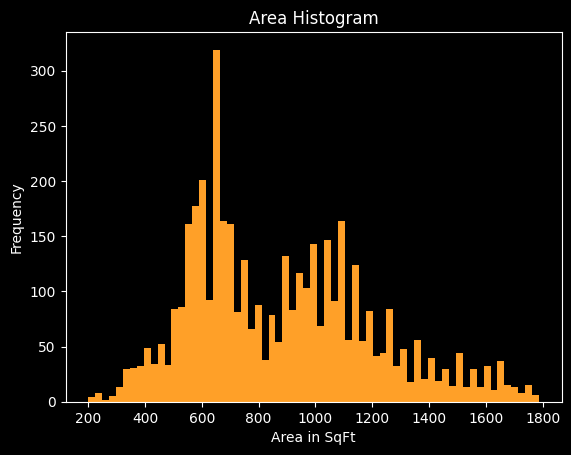

In [90]:
condition_area = mumbai_data['Area'] < 3700
df_area = mumbai_data['Area'][condition_area]
plt.title("Area Histogram")
plt.hist( df_area , bins = int(np.sqrt(len(df_area))) , color='#FFA028')
plt.xlabel("Area in SqFt")
plt.ylabel("Frequency")
plt.show()

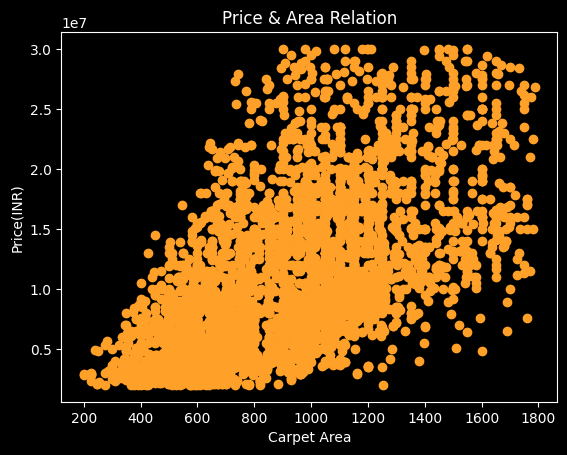

In [91]:
#Area and Price
mumbai_data = mumbai_data.sort_values(by='Area' , ascending=True)
plt.title("Price & Area Relation")
plt.scatter( mumbai_data['Area'] , mumbai_data['Price'], color='#FFA028' )
plt.xlabel("Carpet Area")
plt.ylabel("Price(INR)")
plt.show()

In [92]:
mumbai_data.to_csv("MumbaiMerged.csv")
# This new csv file contained merged attributes ans is a lot more cleaner then before